In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [3]:
def prepro(df, colname):
    seqLen = 50
    seqLength = seqLen + 1
    result = []
    for idx in range(len(df)-seqLength):
        result.append(df[colname][idx:idx+seqLength]) # window is 50

    normedData = []
    for window in result:
        normedWindow = [((float(p)/float(window[0]))-1) for p in window]
        normedData.append(normedWindow)


    result = np.array(normedData)
    return(result)

In [4]:
def splitTT(result):
    row = int(round(result.shape[0]*0.9))
    train = result[:row,:]
    np.random.shuffle(train)


    xTrain = train[:,:-1]
    xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1],1))
    yTrain = train[:,-1]

    xTest = result[row:,:-1]
    xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1],1))
    yTest = result[row:,-1]
    
    return(xTrain, yTrain, xTest, yTest)

### modeling_close

In [5]:
df = fdr.DataReader('005930', '2010')
result = prepro(df,"Close")

In [7]:
xTrain, yTrain, xTest, yTest = splitTT(result)

In [8]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (50,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1,activation = 'linear'))
model.compile(loss='mse',optimizer ='rmsprop')

In [9]:
model.fit(xTrain,yTrain, batch_size = 20, epochs=7)

Epoch 1/7
120/120 [==============================] - 4s 30ms/step - loss: 0.0016
Epoch 2/7
120/120 [==============================] - 3s 28ms/step - loss: 7.2125e-04
Epoch 3/7
120/120 [==============================] - 3s 28ms/step - loss: 5.2367e-04
Epoch 4/7
120/120 [==============================] - 3s 28ms/step - loss: 4.0641e-04
Epoch 5/7
120/120 [==============================] - 3s 28ms/step - loss: 3.6582e-04
Epoch 6/7
120/120 [==============================] - 3s 28ms/step - loss: 3.5453e-04
Epoch 7/7
120/120 [==============================] - 3s 27ms/step - loss: 3.4756e-04


In [10]:
pred = model.predict(xTest)

In [19]:
pred

array([[ 0.19205542],
       [ 0.18001032],
       [ 0.22546673],
       [ 0.20383276],
       [ 0.21662202],
       [ 0.2529594 ],
       [ 0.22225906],
       [ 0.18023126],
       [ 0.13181852],
       [ 0.09867743],
       [ 0.11100939],
       [ 0.10965684],
       [ 0.10978271],
       [ 0.12286977],
       [ 0.08343884],
       [ 0.03225053],
       [ 0.03490267],
       [ 0.02149698],
       [ 0.00845221],
       [ 0.02205819],
       [ 0.03379657],
       [ 0.06573294],
       [ 0.05637897],
       [ 0.06914709],
       [ 0.12769854],
       [ 0.1464598 ],
       [ 0.15103371],
       [ 0.16778207],
       [ 0.16515832],
       [ 0.1472785 ],
       [ 0.1294954 ],
       [ 0.11772042],
       [ 0.09558976],
       [ 0.10893132],
       [ 0.14386278],
       [ 0.11794356],
       [ 0.0876091 ],
       [ 0.09464428],
       [ 0.10464734],
       [ 0.10620494],
       [ 0.11691165],
       [ 0.15586482],
       [ 0.18754748],
       [ 0.19730002],
       [ 0.17901093],
       [ 0

### plotting_close

In [20]:
import matplotlib.pyplot as plt

In [21]:
yTest[:10]

array([0.17139614, 0.19139298, 0.20967742, 0.2       , 0.2260274 ,
       0.23699422, 0.21315193, 0.13785558, 0.10151188, 0.10021322])

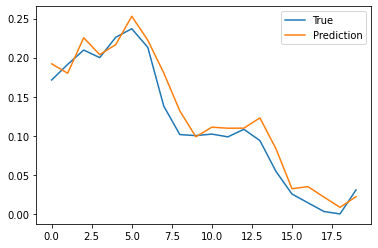

In [22]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(yTest[:20], label='True')
ax.plot(pred[:20], label='Prediction')
ax.legend()
plt.show()

In [78]:
row = int(round(result.shape[0]*0.9))

In [79]:
real = []
predict = []
for i in range(len(yTest)-1):
    real.append(df[row:]['Close'].values[i]*(1+yTest[i]))
    predict.append(df[row:]['Close'].values[i]*(1+pred[i])[0])

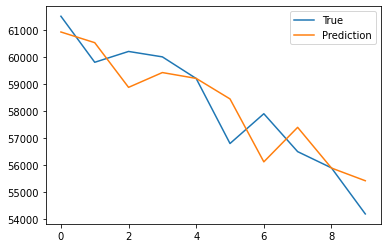

In [80]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(real[110:120], label='True')
ax.plot(predict[110:120], label='Prediction')
ax.legend()
plt.show()

잘 적합하는것같지만 그냥 하루 밀린 그래프<br>
-> close가 아닌 change로

### modeling_change
종가(Close)가 아닌 변화량(Change) 예측

In [83]:
#정규화 뺀 부분
def prepro2(df, colname):
    seqLen = 50
    seqLength = seqLen + 1
    result = []
    for idx in range(len(df)-seqLength):
        result.append(df[colname][idx:idx+seqLength]) # window is 50

    return(np.array(result))

In [84]:
result = prepro2(df,"Change")

In [85]:
xTrain, yTrain, xTest, yTest =splitTT(result)

In [86]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (50,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1,activation = 'linear'))
model.compile(loss='mse',optimizer ='rmsprop')

In [87]:
model.fit(xTrain,yTrain, batch_size = 20, epochs=7)

Epoch 1/7
117/117 [==============================] - 4s 36ms/step - loss: 3.3891e-04
Epoch 2/7
117/117 [==============================] - 4s 31ms/step - loss: 2.9824e-04
Epoch 3/7
117/117 [==============================] - 4s 34ms/step - loss: 2.9651e-04
Epoch 4/7
117/117 [==============================] - 5s 47ms/step - loss: 2.9403e-04
Epoch 5/7
117/117 [==============================] - 4s 33ms/step - loss: 2.9460e-04
Epoch 6/7
117/117 [==============================] - 4s 36ms/step - loss: 2.9255e-04
Epoch 7/7
117/117 [==============================] - 6s 53ms/step - loss: 2.9301e-04


In [88]:
pred = model.predict(xTest)

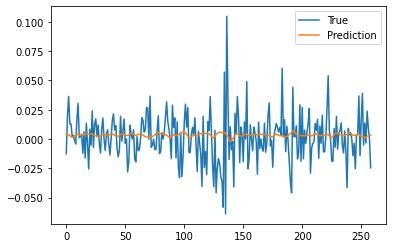

In [89]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(yTest, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

too bad - 거의 0에 수렴